# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [ ]:
%%cmd
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [1]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [2]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import os
from zipfile import ZipFile
file = ZipFile('data/nyc-taxi-trip-duration.zip')
path = 'data/practice2/'
file.extractall(path)

In [3]:

ls = os.listdir(path)
for archive in ls:
    if archive.endswith('.zip'):
        file = ZipFile(os.path.join(path, archive))
        file.extractall(path)

In [4]:
os.listdir('data/practice2/')

['sample_submission.csv',
 'sample_submission.zip',
 'test.csv',
 'test.zip',
 'train.csv',
 'train.zip',
 'x_train_buf.csv',
 'x_val_buf.csv']

In [5]:
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))
submission = pd.read_csv(os.path.join(path, 'sample_submission.csv'))
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.drop(['dropoff_datetime'], axis=1, inplace=True)
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(train, test_size=0.3, random_state=42)

In [9]:
print('Размер всей выборки: {}'.format(train.shape))
print('Размер обучающей выборки: {}'.format(x_train.shape))
print('Размер валидационной выборки: {}'.format(x_test.shape))

Размер всей выборки: (1458644, 10)
Размер обучающей выборки: (1021050, 10)
Размер валидационной выборки: (437594, 10)


Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [10]:
x_train['trip_duration'].values

array([ 844, 1001, 1048, ..., 1285,  389, 1570], dtype=int64)

(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.50000e+01, 8.65820e+03, 1.72414e+04, 2.58246e+04, 3.44078e+04,
        4.29910e+04, 5.15742e+04, 6.01574e+04, 6.87406e+04, 7.73238e+04,
        8.59070e+04]),
 <a list of 10 Patch objects>)

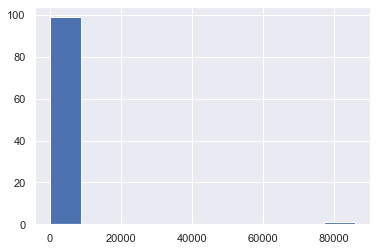

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(x_train['trip_duration'].sample(100), bins=10)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

<ipython-input-12-b8bae557e890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['log_trip_duration'] = np.log1p(x_train.trip_duration)
<ipython-input-12-b8bae557e890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['log_trip_duration'] = np.log1p(x_val.trip_duration)


(array([2.6000e+01, 0.0000e+00, 1.1700e+02, 0.0000e+00, 2.2600e+02,
        0.0000e+00, 2.3700e+02, 2.1300e+02, 1.3500e+02, 1.6300e+02,
        1.4000e+02, 2.8800e+02, 1.2200e+02, 2.2700e+02, 3.1500e+02,
        1.8300e+02, 3.6500e+02, 2.9100e+02, 3.4400e+02, 4.1800e+02,
        4.0700e+02, 5.5400e+02, 6.5700e+02, 1.0040e+03, 1.2010e+03,
        1.9820e+03, 3.0000e+03, 4.1300e+03, 6.1460e+03, 9.0250e+03,
        1.3322e+04, 1.8592e+04, 2.4728e+04, 3.1481e+04, 4.1056e+04,
        4.8330e+04, 5.7716e+04, 6.5446e+04, 7.2292e+04, 7.7696e+04,
        7.8795e+04, 7.8858e+04, 7.5427e+04, 6.8153e+04, 5.9690e+04,
        4.9629e+04, 3.8924e+04, 2.9116e+04, 2.0450e+04, 1.4315e+04,
        9.6730e+03, 6.2020e+03, 3.8610e+03, 2.1920e+03, 1.0720e+03,
        4.1900e+02, 1.3600e+02, 6.0000e+01, 2.4000e+01, 1.5000e+01,
        1.1000e+01, 6.0000e+00, 3.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.2000e+01, 1.0000e+01, 1.5000e+01, 9.0000e+00,
        4.0000e+00, 1.3000e+01, 1.4000e+01, 1.47

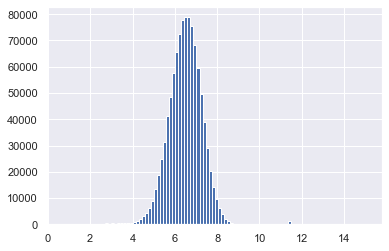

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['log_trip_duration'] = np.log1p(x_train.trip_duration)
x_test['log_trip_duration'] = np.log1p(x_test.trip_duration)
plt.hist(x_train['log_trip_duration'].values, bins=100)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def MSE(y, y_hat):
    return np.sum(np.square(np.array(y) - np.array(y_hat))) / len(y)

print('Test MSE([0,1,1], [0, 0, 0]): {}'.format(MSE([0,1,1], [0, 0, 0])))

Test MSE([0,1,1], [0, 0, 0]): 0.6666666666666666


In [14]:
print('При среднем значении: {}'.format(MSE(x_train.log_trip_duration.values, x_train['log_trip_duration'].mean())))
print('При медиане: {}'.format(MSE(x_train.log_trip_duration.values, x_train['log_trip_duration'].median())))

При среднем значении: 0.6337320188891268
При медиане: 0.6347064265485545


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [15]:
x_train['date'] = x_train.pickup_datetime.dt.date
x_train['dayofyear'] = x_train.pickup_datetime.dt.dayofyear
x_train['dayofweek'] = x_train.pickup_datetime.dt.dayofweek
x_train['hour'] = x_train.pickup_datetime.dt.hour
x_train['month'] = x_train.pickup_datetime.dt.month

x_test['date'] = x_test.pickup_datetime.dt.date
x_test['dayofyear'] = x_test.pickup_datetime.dt.dayofyear
x_test['dayofweek'] = x_test.pickup_datetime.dt.dayofweek
x_test['hour'] = x_test.pickup_datetime.dt.hour
x_test['month'] = x_test.pickup_datetime.dt.month

<ipython-input-15-47ab58f74843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['date'] = x_train.pickup_datetime.dt.date
<ipython-input-15-47ab58f74843>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['dayofyear'] = x_train.pickup_datetime.dt.dayofyear
<ipython-input-15-47ab58f74843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

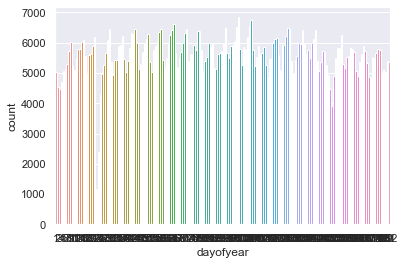

In [16]:
sns.countplot(x='dayofyear', data=x_train)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_trip_count = x_train.groupby('dayofyear').agg({'id':'count'}).sort_values('id')
day_trip_count.reset_index(inplace=True)

day_date = x_train[['dayofyear', 'date']].drop_duplicates()
anomaly_days = day_trip_count[:4]
anomaly_days = pd.merge(anomaly_days, day_date, on='dayofyear', how='left')

print('Даты аномалий: {}'.format(anomaly_days.iloc[:4].date))

Даты аномалий: 0    2016-01-23
1    2016-01-24
2    2016-05-30
3    2016-01-25
Name: date, dtype: object


https://en.wikipedia.org/wiki/January_2016_United_States_blizzard

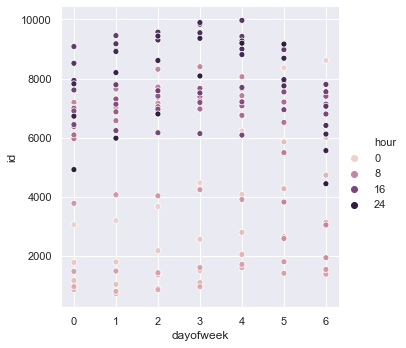

In [18]:
dayofweek_hour = x_train.groupby(['dayofweek', 'hour']).agg({'id':'count'})
dayofweek_hour.reset_index(inplace=True)
sns.relplot(data=dayofweek_hour, x='dayofweek', y='id', hue='hour')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

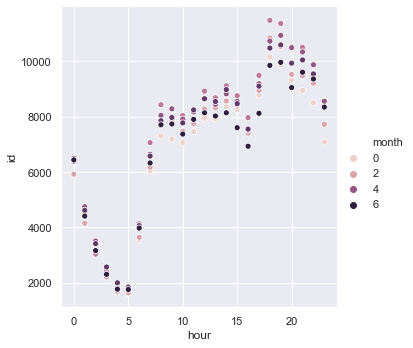

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
month_hour = x_train.groupby(['month', 'hour']).agg({'id':'count'})
month_hour.reset_index(inplace=True)
sns.relplot(data=month_hour, x='hour', y='id', hue='month')

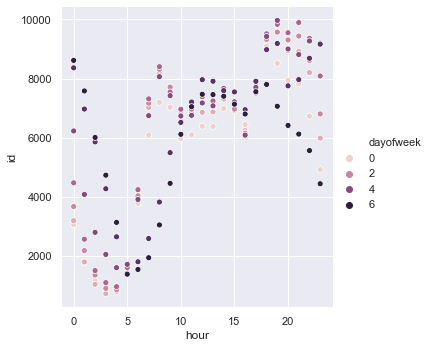

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dayofweek_hour = x_train.groupby(['dayofweek', 'hour']).agg({'id':'count'})
dayofweek_hour.reset_index(inplace=True)
sns.relplot(data=dayofweek_hour, x='hour', y='id', hue='dayofweek')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

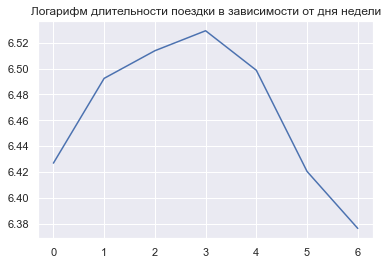

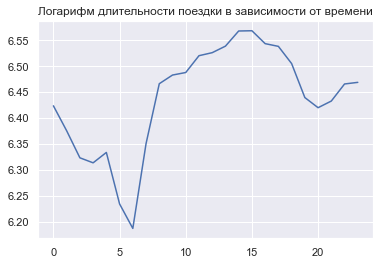

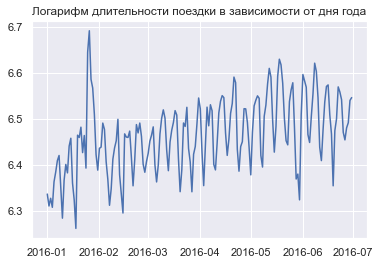

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dayofweek = x_train.groupby('dayofweek').agg({'log_trip_duration':'mean'})
dayofweek.reset_index(inplace=True)
hour = x_train.groupby('hour').agg({'log_trip_duration':'mean'})
hour.reset_index(inplace=True)
date = x_train.groupby('date').agg({'log_trip_duration':'mean'})
date.reset_index(inplace=True)

plt.plot(dayofweek.dayofweek, dayofweek.log_trip_duration)
plt.title('Логарифм длительности поездки в зависимости от дня недели')
plt.show()
plt.plot(hour.hour, hour.log_trip_duration)
plt.title('Логарифм длительности поездки в зависимости от времени')
plt.show()
plt.plot(date.date, date.log_trip_duration)
plt.title('Логарифм длительности поездки в зависимости от дня года')
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
blizzard_days = [23, 24, 25]
second_anomaly = [151]
x_train['blizzard'] = x_train['dayofyear'].apply(lambda x: 1 if x in blizzard_days else 0)
x_train['second_anomaly'] = x_train['dayofyear'].apply(lambda x: 1 if x in second_anomaly else 0)

x_test['blizzard'] = x_test['dayofyear'].apply(lambda x: 1 if x in blizzard_days else 0)
x_test['second_anomaly'] = x_test['dayofyear'].apply(lambda x: 1 if x in second_anomaly else 0)

<ipython-input-22-9c44a400c489>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['blizzard'] = x_train['dayofyear'].apply(lambda x: 1 if x in blizzard_days else 0)
<ipython-input-22-9c44a400c489>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['second_anomaly'] = x_train['dayofyear'].apply(lambda x: 1 if x in second_anomaly else 0)
<ipython-input-22-9c44a400c489>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [23]:
print('Размер обучающей выборки: {}'.format(x_train.shape))
print('Размер валидирующей выборки: {}'.format(x_test.shape))

Размер обучающей выборки: (1021050, 18)
Размер валидирующей выборки: (437594, 18)


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [198]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

features = ['dayofyear', 'blizzard', 'second_anomaly', 'log_trip_duration']
categorical = ['dayofweek', 'month', 'hour']

for feature in categorical:
    x_train[feature] = x_train[feature].astype('category')
    x_test[feature] = x_train[feature].astype('category')

x_train_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

x_test_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

model = Ridge()
model.fit(x_train_dum.drop(['log_trip_duration'], axis=1), x_train_dum['log_trip_duration'])
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.5887169520130783


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [25]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [26]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [27]:
show_circles_on_map(x_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.750218746185304, -73.971798828125], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [28]:
show_circles_on_map(x_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.75318759536743, -73.97204283905029], controls=(ZoomControl(options=['position', 'zoom_in_text',…

**Вопрос**: Какие две точки выделяются на карте?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [29]:
def haversine_distance(pickup_lat, pickup_lng, dropoff_lat, dropoff_lng):
    pickup_lat, pickup_lng, dropoff_lat, dropoff_lng = map(np.radians,
                                                           (pickup_lat, pickup_lng, dropoff_lat, dropoff_lng))
    radius = 6371
    lat = dropoff_lat - pickup_lat
    lng = dropoff_lng - pickup_lng
    d = np.sin(lat * 0.5) ** 2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(lng * 0.5) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

def haversine(pickup_lat, pickup_lng, dropoff_lat, dropoff_lng):
    pickup_lat, pickup_lng, dropoff_lat, dropoff_lng = map(np.radians,
                                                           (pickup_lat, pickup_lng, dropoff_lat, dropoff_lng))
    
    pickup = np.concatenate([pickup_lat, pickup_lng], axis=1)
    dropoff = np.concatenate([dropoff_lat, dropoff_lng], axis=1)
    return haversine_distances([pickup, dropoff])

x_train.loc[:, 'haversine_dist'] = haversine_distance(x_train['pickup_latitude'].values,
                                                 x_train['pickup_longitude'].values,
                                                 x_train['dropoff_latitude'].values,
                                                 x_train['dropoff_longitude'].values)
x_test.loc[:, 'haversine_dist'] = haversine_distance(x_test['pickup_latitude'].values,
                                                 x_test['pickup_longitude'].values,
                                                 x_test['dropoff_latitude'].values,
                                                 x_test['dropoff_longitude'].values)

C:\Users\sqrte\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sqrte\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['log_haversine'] = np.log(x_train['haversine_dist'].values+ 0.001)
x_test['log_haversine'] = np.log(x_test['haversine_dist'].values+ 0.001)

<ipython-input-30-bdb220df2572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['log_haversine'] = np.log(x_train['haversine_dist'].values+ 0.001)
<ipython-input-30-bdb220df2572>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['log_haversine'] = np.log(x_val['haversine_dist'].values+ 0.001)


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

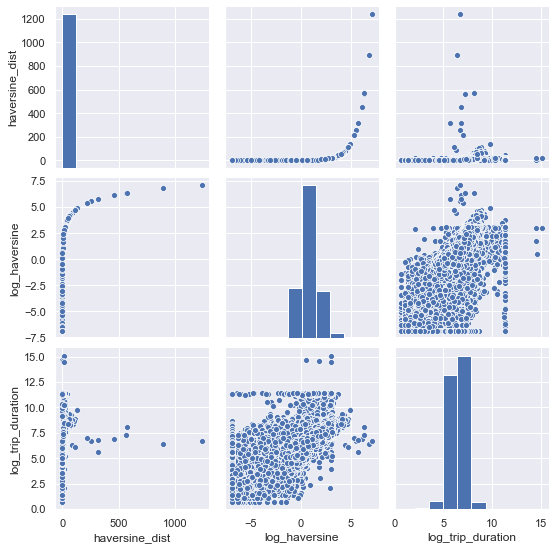

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
corr_df = x_train[['haversine_dist' , 'log_haversine', 'log_trip_duration']]
sns.pairplot(corr_df)

In [32]:
x_train.corr().loc[['haversine_dist' , 'log_haversine', 'log_trip_duration']][['haversine_dist' , 'log_haversine', 'log_trip_duration']]

,haversine_dist,log_haversine,log_trip_duration
haversine_dist,1.000000,0.677979,0.565406
log_haversine,0.677979,1.000000,0.723169
log_trip_duration,0.565406,0.723169,1.000000


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<ipython-input-33-75cb1898c0ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['avg_speed'] = x_train['haversine_dist'] / x_train['trip_duration']


(array([ 61., 264., 323., 182.,  90.,  34.,  22.,  14.,   7.,   3.]),
 array([0.        , 0.0014011 , 0.00280221, 0.00420331, 0.00560442,
        0.00700552, 0.00840662, 0.00980773, 0.01120883, 0.01260994,
        0.01401104]),
 <a list of 10 Patch objects>)

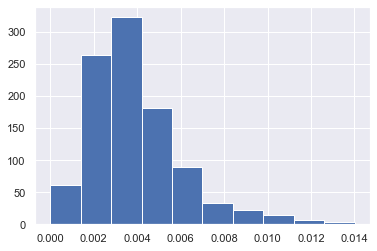

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['avg_speed'] = x_train['haversine_dist'] / x_train['trip_duration']

plt.hist(x_train['avg_speed'].sample(1000))

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

(array([ 16930.,  61525., 157248., 206360., 183604., 133692.,  89352.,
         58446.,  38018.,  24822.]),
 array([0.        , 0.00081828, 0.00163655, 0.00245483, 0.0032731 ,
        0.00409138, 0.00490966, 0.00572793, 0.00654621, 0.00736448,
        0.00818276]),
 <a list of 10 Patch objects>)

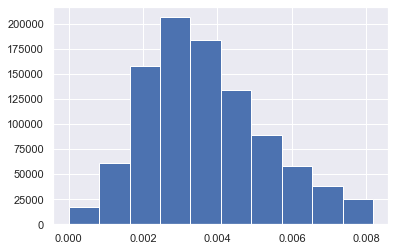

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
quant = x_train['avg_speed'].quantile(0.95)
plt.hist(x_train[x_train['avg_speed'] < quant]['avg_speed'].values)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

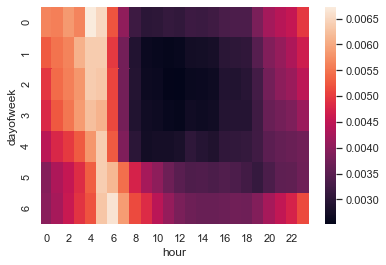

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
dayofweek_hour_speed = x_train.groupby(['dayofweek', 'hour']).agg({'avg_speed':'median'})
dayofweek_hour_speed.reset_index(inplace=True)
dayofweek_hour_speed = dayofweek_hour_speed.pivot('dayofweek', 'hour', 'avg_speed')
sns.heatmap(dayofweek_hour_speed)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.drop(['avg_speed'], axis=1, inplace=True)

C:\Users\sqrte\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

https://www.tomtom.com/en_gb/traffic-index/new-york-traffic/

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['congestion'] = x_train['hour'].apply(lambda x: 1 if x in range(6, 22) else 0)
x_test['congestion'] = x_test['hour'].apply(lambda x: 1 if x in range(6, 22) else 0)

<ipython-input-37-6635bdaba6e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['congestion'] = x_train['hour'].apply(lambda x: 1 if x in range(6, 22) else 0)
<ipython-input-37-6635bdaba6e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['congestion'] = x_val['hour'].apply(lambda x: 1 if x in range(6, 22) else 0)


**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [150]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def la_guardia_pickup(data):
    return 1 if ((data['pickup_latitude'] < 40.788005) & (data['pickup_latitude'] > 40.764437) & 
                 (data['pickup_longitude'] > -73.876410) & (data['pickup_longitude'] < -73.872657)) else 0
def la_guardia_dropoff(data):
    return 1 if ((data['dropoff_latitude'] < 40.788005) & (data['dropoff_latitude'] > 40.764437) & 
                 (data['dropoff_longitude'] > -73.876410) & (data['dropoff_longitude'] < -73.872657)) else 0

def john_k_pickup(data):
    return 1 if ((data['pickup_latitude'] < 40.666546) & (data['pickup_latitude'] > 40.614670) & 
                 (data['pickup_longitude'] > -73.893473) & (data['pickup_longitude'] < -73.851284)) else 0
def john_k_dropoff(data):
    return 1 if ((data['pickup_latitude'] < 40.666546) & (data['pickup_latitude'] > 40.614670) & 
                 (data['pickup_longitude'] > -73.893473) & (data['pickup_longitude'] < -73.851284)) else 0

In [149]:
x_train['la_guardia_pickup'] = x_train.apply(la_guardia_pickup, axis=1)
x_train['la_guardia_dropoff'] = x_train.apply(la_guardia_dropoff, axis=1)
x_train['john_k_pickup'] = x_train.apply(john_k_pickup, axis=1)
x_train['john_k_dropoff'] = x_train.apply(john_k_dropoff, axis=1)

<ipython-input-149-afc80b5fa581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['la_guardia_pickup'] = x_train.apply(la_guardia_pickup, axis=1)
<ipython-input-149-afc80b5fa581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['la_guardia_dropoff'] = x_train.apply(la_guardia_dropoff, axis=1)


In [154]:
x_test['la_guardia_pickup'] = x_test.apply(la_guardia_pickup, axis=1)
x_test['la_guardia_dropoff'] = x_test.apply(la_guardia_dropoff, axis=1)
x_test['john_k_pickup'] = x_test.apply(john_k_pickup, axis=1)
x_test['john_k_dropoff'] = x_test.apply(john_k_dropoff, axis=1)

<ipython-input-154-ce09f48d9491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['la_guardia_pickup'] = x_val.apply(la_guardia_pickup, axis=1)
<ipython-input-154-ce09f48d9491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['la_guardia_dropoff'] = x_val.apply(la_guardia_dropoff, axis=1)
<ipython-input-154-ce09f48d9491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [46]:
x_train.to_csv('data/practice2/x_train_buf.csv', index=False)
x_test.to_csv('data/practice2/x_test_buf.csv', index=False)

In [126]:
x_train = pd.read_csv('data/practice2/x_train_buf.csv')
x_test = pd.read_csv('data/practice2/x_test_buf.csv')
x_train.shape[1] == x_val.shape[1]

True

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

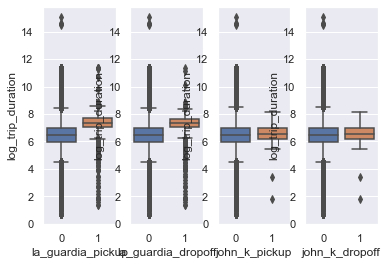

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axs = plt.subplots(1, 4)
sns.boxplot(x='la_guardia_pickup', y='log_trip_duration', data=x_train, ax=axs[0])
sns.boxplot(x='la_guardia_dropoff', y='log_trip_duration', data=x_train, ax=axs[1])
sns.boxplot(x='john_k_pickup', y='log_trip_duration', data=x_train, ax=axs[2])
sns.boxplot(x='john_k_dropoff', y='log_trip_duration', data=x_train, ax=axs[3])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [197]:
features = ['dayofyear', 'dayofweek', 'month', 'hour', 'blizzard', 'second_anomaly',
           'haversine_dist', 'log_haversine', 'congestion', 'la_guardia_pickup', 'la_guardia_dropoff',
           'john_k_pickup', 'john_k_dropoff', 'log_trip_duration']

categorical = ['dayofweek', 'month', 'hour']
numerical = ['haversine_dist', 'log_haversine']

for feature in categorical:
    x_train[feature] = x_train[feature].astype('category')
    x_test[feature] = x_train[feature].astype('category')

scaler = StandardScaler()
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_test[numerical] = scaler.transform(x_test[numerical])

x_train_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

x_test_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

model = Ridge()
model.fit(x_train_dum.drop(['log_trip_duration'], axis=1), x_train_dum['log_trip_duration'])
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.26210770313976267


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()

vendor_id              2
passenger_count       10
store_and_fwd_flag     2
dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

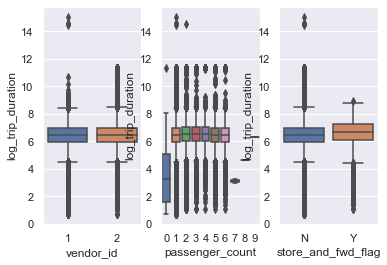

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axs = plt.subplots(1, 3)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=x_train, ax=axs[0])
sns.boxplot(x='passenger_count', y='log_trip_duration', data=x_train, ax=axs[1])
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=x_train, ax=axs[2])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [174]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['vendor_id_binary'] = x_train['vendor_id'].map({1:0, 2:1})
x_train['store_and_fwd_flag_binary'] = x_train['store_and_fwd_flag'].map({'N':0, 'Y':1})

x_test['vendor_id_binary'] = x_test['vendor_id'].map({1:0, 2:1})
x_test['store_and_fwd_flag_binary'] = x_test['store_and_fwd_flag'].map({'N':0, 'Y':1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [196]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
features = ['dayofyear', 'blizzard', 'second_anomaly',
           'haversine_dist', 'log_haversine', 'congestion', 'la_guardia_pickup', 'la_guardia_dropoff',
           'john_k_pickup', 'john_k_dropoff', 'vendor_id_binary', 'store_and_fwd_flag_binary',
            'passenger_count', 'log_trip_duration']


categorical = ['dayofweek', 'month', 'hour']
numerical = ['haversine_dist', 'log_haversine']

for feature in categorical:
    x_train[feature] = x_train[feature].astype('category')
    x_test[feature] = x_train[feature].astype('category')

scaler = StandardScaler()
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_test[numerical] = scaler.transform(x_test[numerical])

x_train_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

x_test_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

model = Ridge()
model.fit(x_train_dum.drop(['log_trip_duration'], axis=1), x_train_dum['log_trip_duration'])
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.2619643051875467


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

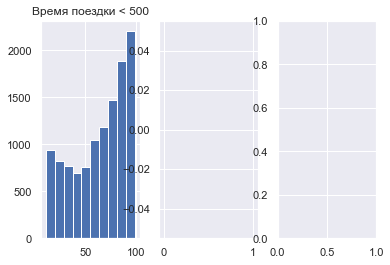

In [125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axs = plt.subplots(1, 3)
axs[0].hist(x_train[x_train['trip_duration'] < 100]['trip_duration'])
axs[0].set_title('Время поездки < 500')
axs[1].hist(x_train[x_train['haversine_dist'] > 25]['haversine_dist'])

In [127]:
x_train = pd.read_csv('data/practice2/x_train_buf.csv')
x_test = pd.read_csv('data/practice2/x_test_buf.csv')

x_train.shape[1] == x_test.shape[1]

True

In [128]:
x_train = x_train[x_train['trip_duration'] > 10]
x_train = x_train[x_train['haversine_dist'] < 25]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [159]:
x_train['to_from_airport'] = x_train['la_guardia_pickup'].values | x_train['la_guardia_dropoff'].values | x_train['john_k_pickup'].values | x_train['john_k_dropoff'].values
x_test['to_from_airport'] = x_test['la_guardia_pickup'].values | x_test['la_guardia_dropoff'].values | x_test['john_k_pickup'].values | x_test['john_k_dropoff'].values

x_train['trafic_anomaly'] = x_train['blizzard'].values | x_train['second_anomaly']
x_test['trafic_anomaly'] = x_test['blizzard'].values | x_test['second_anomaly']


In [203]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
features = ['trafic_anomaly', 'dayofyear',
           'haversine_dist', 'log_haversine', 'congestion', 'to_from_airport', 'log_trip_duration']

categorical = ['dayofweek', 'month', 'hour']

for feature in categorical:
    x_train[feature] = x_train[feature].astype('category')
    x_test[feature] = x_train[feature].astype('category')

x_train_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

x_test_dum = pd.concat([x_train[features],
                    pd.get_dummies(x_train[categorical])],
                   axis=1)

model = Ridge()
model.fit(x_train_dum.drop(['log_trip_duration'], axis=1), x_train_dum['log_trip_duration'])
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.2625838210216259


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [200]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Количество признаков до кодирования: {}'.format(len(features) + len(categorical)))
print('Количестов признаков после кодирования: {}'.format(x_train_dum.shape[1]))

Количество признаков до кодирования: 10
Количестов признаков после кодирования: 44


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [205]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(x_train_dum.drop(['log_trip_duration'], axis=1), x_train_dum['log_trip_duration'])
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.5988062204233138


Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [247]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
x_train_dum, x_val_dum = train_test_split(x_train_dum, test_size=0.2, random_state=42)

model = Lasso()
alphas = [0.00001, 0.0001, 0.001, 0.01]
lasso_params = {'alpha':alphas}
search = GridSearchCV(model, lasso_params, cv=5)
search.fit(x_val_dum.drop(['log_trip_duration'], axis=1), x_val_dum['log_trip_duration'])

C:\Users\sqrte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.27146070971696, tolerance: 0.3585350335439578
  model = cd_fast.enet_coordinate_descent(
C:\Users\sqrte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198.16979324201168, tolerance: 0.3546460815821407
  model = cd_fast.enet_coordinate_descent(
C:\Users\sqrte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.561943205076886, tolerance: 0.34470018109405853
  model = cd_fast.enet_coordinate_descent(
C:\Users\sqrte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01]})

In [248]:
model = search.best_estimator_
predictions = model.predict(x_test_dum.drop(['log_trip_duration'], axis=1))
print('MSE: {}'.format(MSE(x_test_dum['log_trip_duration'], predictions)))

MSE: 0.2643619241383323


Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

C:\Users\sqrte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246.98839822704645, tolerance: 0.43981178191812087
  model = cd_fast.enet_coordinate_descent(


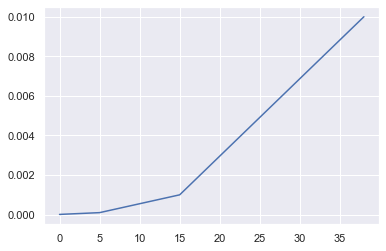

In [250]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
zero_weights = []

for alpha in alphas:
    model = Lasso(alpha)
    model.fit(x_val_dum.drop(['log_trip_duration'], axis=1), x_val_dum['log_trip_duration'])
    zero_weights.append((model.coef_ == 0).sum())

plt.plot(zero_weights, alphas)

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ